In [1]:
import numpy as np

x_data = np.array([1, 2, 3, 4, 5]).reshape(5,1) # 학습 데이터
t_data = np.array([2, 3, 4, 5, 6]).reshape(5,1) # 정답 데이터

W = np.random.rand(1,1) # 가중치 W
b = np.random.rand(1) # 바이어스 b

In [2]:
W, b

(array([[0.96811176]]), array([0.76804316]))

In [3]:
def loss_func(x, t): # MSE
    y = np.dot(x,W) + b
    return (np.sum((t - y)**2 )) / (len(x))

In [4]:
def numerical_derivative(f, x):
    delta_x = 1e-4
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x)

        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x)

        grad[idx] = (fx1 - fx2) / (2*delta_x)
        x[idx] = tmp_val
        it.iternext()
    return grad

In [5]:
learning_rate = 1e-2
f = lambda x : loss_func(x_data, t_data)
print("Initial loss value = ", loss_func(x_data, t_data), "Initial W = ", W, "\n", ", b = ", b )
for step in range(6001):
    W -= learning_rate * numerical_derivative(f, W)
    b -= learning_rate * numerical_derivative(f, b)
    if (step % 300 == 0):
        print("step = ", step, "loss value = ", loss_func(x_data, t_data), "W =", W, "b =", b) 

Initial loss value =  0.10936960080181427 Initial W =  [[0.96811176]] 
 , b =  [0.76804316]
step =  0 loss value =  0.06759410996255137 W = [[0.98904458]] b = [0.77333962]
step =  300 loss value =  0.0010349018358695424 W = [[1.02089038]] b = [0.92459756]
step =  600 loss value =  0.00013138471630957065 W = [[1.00744336]] b = [0.97313368]
step =  900 loss value =  1.6679788441231385e-05 W = [[1.00265211]] b = [0.99042737]
step =  1200 loss value =  2.117562455199933e-06 W = [[1.00094496]] b = [0.99658922]
step =  1500 loss value =  2.6883259146084424e-07 W = [[1.0003367]] b = [0.99878472]
step =  1800 loss value =  3.412931791172578e-08 W = [[1.00011997]] b = [0.99956699]
step =  2100 loss value =  4.332846455839121e-09 W = [[1.00004274]] b = [0.99984572]
step =  2400 loss value =  5.500713040603576e-10 W = [[1.00001523]] b = [0.99994503]
step =  2700 loss value =  6.983363999535882e-11 W = [[1.00000543]] b = [0.99998041]
step =  3000 loss value =  8.86564567034914e-12 W = [[1.00000193

In [6]:
def predict(x):
    y = np.dot(x,W) + b
    return y

In [7]:
predict(np.array([43]))

array([44.])

In [8]:
import numpy as np

loaded_data = np.loadtxt('./data_01.csv', delimiter=',', dtype=np.float32)
x_data = loaded_data[:, 0:-1] 
t_data = loaded_data[:, [-1]] 

print("x_data.ndim = ", x_data.ndim, ", x_data.shape = ", x_data.shape)
print("t_data.ndim = ", t_data.ndim, ", t_data.shape = ", t_data.shape)

x_data.ndim =  2 , x_data.shape =  (9, 3)
t_data.ndim =  2 , t_data.shape =  (9, 1)


In [9]:
np.random.seed(42)
W = np.random.rand(3,1)
b = np.random.rand(1)
print("W = ", W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)

W =  [[0.37454012]
 [0.95071431]
 [0.73199394]] , W.shape =  (3, 1) , b =  [0.59865848] , b.shape =  (1,)


In [10]:
learning_rate = 1e-5
f = lambda x : loss_func(x_data,t_data)
print("Initial loss value = ", loss_func(x_data, t_data) )
for step in range(30001):
    W -= learning_rate * numerical_derivative(f, W)
    b -= learning_rate * numerical_derivative(f, b)
    if (step % 300 == 0):
        print("step = ", step, "loss value = ", loss_func(x_data, t_data), "W =", W, "b =", b)

Initial loss value =  18.912018958218844
step =  0 loss value =  11.964774630423882 W = [[0.36933621]
 [0.94535252]
 [0.72658915]] b = [0.59861768]
step =  300 loss value =  6.718608878884331 W = [[0.37657351]
 [0.90182075]
 [0.73444869]] b = [0.59898902]
step =  600 loss value =  6.238106572074405 W = [[0.39056818]
 [0.87061379]
 [0.75089825]] b = [0.59940598]
step =  900 loss value =  5.842269289702312 W = [[0.40250021]
 [0.84233207]
 [0.7665289 ]] b = [0.59979593]
step =  1200 loss value =  5.5149518674838856 W = [[0.4126218 ]
 [0.81667871]
 [0.78138247]] b = [0.60015952]
step =  1500 loss value =  5.243225431682761 W = [[0.42115622]
 [0.79338826]
 [0.79549856]] b = [0.60049745]
step =  1800 loss value =  5.016722435447651 W = [[0.42830099]
 [0.77222328]
 [0.80891464]] b = [0.60081047]
step =  2100 loss value =  4.827116484138407 W = [[0.43423081]
 [0.75297136]
 [0.82166619]] b = [0.60109931]
step =  2400 loss value =  4.667709073557063 W = [[0.43910013]
 [0.73544239]
 [0.8337868 ]]

In [11]:
test_data = np.array([100, 98, 81])
predict(test_data)

array([179.13680055])

In [12]:
from sklearn.linear_model import LinearRegression

loaded_data = np.loadtxt('./data_01.csv', delimiter=',', dtype=np.float32)
x_data = loaded_data[:, 0:-1] 
t_data = loaded_data[:, [-1]] 

model = LinearRegression().fit(x_data, t_data)
print(model.coef_, model.intercept_)

[[0.38179097 0.5078311  1.1275766 ]] [-1.0563049]


In [13]:
test_data = np.array([[100, 98, 81]])
pred_data = model.predict(test_data)
pred_data

array([[178.22394288]])

In [14]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("boston_house.csv")
df.head(2)

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.9,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.9,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6


In [15]:
dfx = df.drop(["Target"], axis=1)
dfx.head(2)

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
0,65.2,396.9,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0
1,78.9,396.9,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0


In [16]:
dfy = df["Target"]
dfy

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Target, Length: 506, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, random_state=42)

In [18]:
X_train.shape, X_test.shape

((379, 13), (127, 13))

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
score = model.score(X_test, y_test)
print("정확도 :", score)
print("계수 :", model.coef_)
print("절편 :", model.intercept_)

정확도 : 0.6844267283527113
계수 : [-9.24808158e-03  1.31854199e-02  4.36875476e+00 -1.28322638e-01
 -1.40086668e+00  4.88590934e-02 -5.17639519e-01 -1.62388292e+01
 -9.23122944e-01  2.57761243e-01  2.95517751e-02 -9.95694820e-03
  2.77350326e+00]
절편 : 29.83642016383849


In [21]:
from scipy import stats 

x = [32,64,96,118,126,144,152,158] # 학습 데이터
y = [18,24,61.5,49,52,105,130,125] # 정답 데이터

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y) 
print("slope: {}\nintercept: {}\nr_value: {}\np_value: {}\nstd_err: {}".format(slope, 
                                            intercept, r_value, p_value, std_err))

slope: 0.8744839346616406
intercept: -26.723837731107523
r_value: 0.8880668255497455
p_value: 0.00321829451984264
std_err: 0.18480710092393707


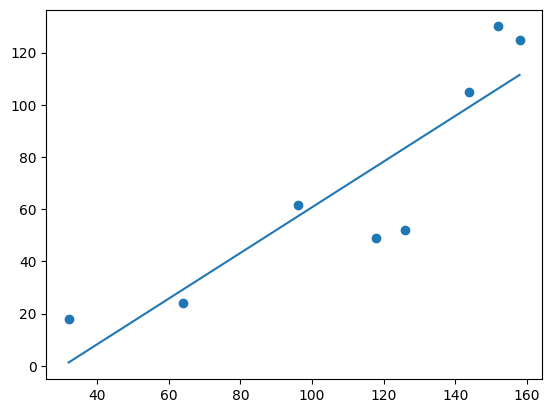

In [22]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.plot(x, slope*np.array(x) + intercept, '-')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("boston_house.csv")
df.head(2)

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.9,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.9,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6


In [24]:
dfx = df.drop(["Target"], axis=1)
dfx.head(2)

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
0,65.2,396.9,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0
1,78.9,396.9,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0


In [25]:
dfy = df["Target"]
dfy

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Target, Length: 506, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.3, random_state=42)

In [30]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
from sklearn.linear_model import LinearRegression

model_boston = LinearRegression().fit(X_train_scaled, y_train)
print(model_boston.coef_)
print(model_boston.intercept_)

[-0.29893918  1.02375187  2.913858   -1.10834602 -2.94251148  0.34313466
 -3.88579002 -1.79804295 -2.05232232  2.09419303  0.80843998 -1.44706731
  0.81386426]
23.01581920903955


In [32]:
model_boston.score(X_train_scaled, y_train)

0.7434997532004697

In [33]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train, model_boston.predict(X_train_scaled)))

4.748208239685937

In [34]:
math.sqrt(mean_squared_error(y_test, model_boston.predict(X_test_scaled)))

4.6386899261728285

In [35]:
from sklearn.metrics import r2_score

r2_score(y_test, model_boston.predict(X_test_scaled))

0.7112260057484923

In [36]:
import statsmodels.api as sm

Boston = sm.datasets.get_rdataset("Boston", package="MASS")
boston_df = Boston.data
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [37]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [38]:
import statsmodels.formula.api as smf

formula = "medv~" + "+".join(boston_df.iloc[:,:-1].columns)
formula

'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [39]:
model_boston = smf.ols(formula=formula, data=boston_df).fit() 
model_boston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          6.72e-135
Time:                        16:11:06   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
model_boston = smf.ols(formula='medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat-1', data=boston_df).fit() 
model_boston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Tue, 26 Nov 2024   Prob (F-statistic):                        0.00
Time:                        16:21:07   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
zn             0.0487      0.014      3.382      0.001       0.020       0.077
indus         -0.0041      0.064     -0.063      0.950      -0.131       0.123
chas           2.8540      0.904      3.157      0.002       1.078       4.630
nox           -2.8684      3.359     -0.854      0.394      -9.468       3.731
rm             5.9281      0.309     19.178      0.000       5.321       6.535
age           -0.0073      0.014     -0.526      0.599      -0.034       0.020
dis           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
rad            0.1712      0.067      2.564      0.011       0.040       0.302
tax           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
ptratio       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
black          0.0149      0.003      5.528      0.000       0.010       0.020
lstat         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
model_boston = smf.ols(formula='medv~crim+zn+chas+rm+dis+rad+tax+ptratio+black+lstat-1', data=boston_df).fit() 
model_boston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1162.
Date:                Tue, 26 Nov 2024   Prob (F-statistic):                        0.00
Time:                        16:23:17   Log-Likelihood:                         -1524.5
No. Observations:                 506   AIC:                                      3069.
Df Residuals:                     496   BIC:                                      3111.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.0911      0.034     -2.655      0.008      -0.158      -0.024
zn             0.0513      0.014      3.634      0.000       0.024       0.079
chas           2.7185      0.891      3.049      0.002       0.967       4.470
rm             5.7145      0.245     23.368      0.000       5.234       6.195
dis           -0.8666      0.167     -5.187      0.000      -1.195      -0.538
rad            0.1828      0.064      2.878      0.004       0.058       0.308
tax           -0.0109      0.003     -3.296      0.001      -0.017      -0.004
ptratio       -0.4002      0.109     -3.681      0.000      -0.614      -0.187
black          0.0145      0.003      5.442      0.000       0.009       0.020
lstat         -0.4492      0.042    -10.575      0.000      -0.533      -0.366
==============================================================================
Omnibus:                      198.045   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1250.213
Skew:                           1.575   Prob(JB):                    3.31e-272
Kurtosis:                      10.027   Cond. No.                     2.24e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

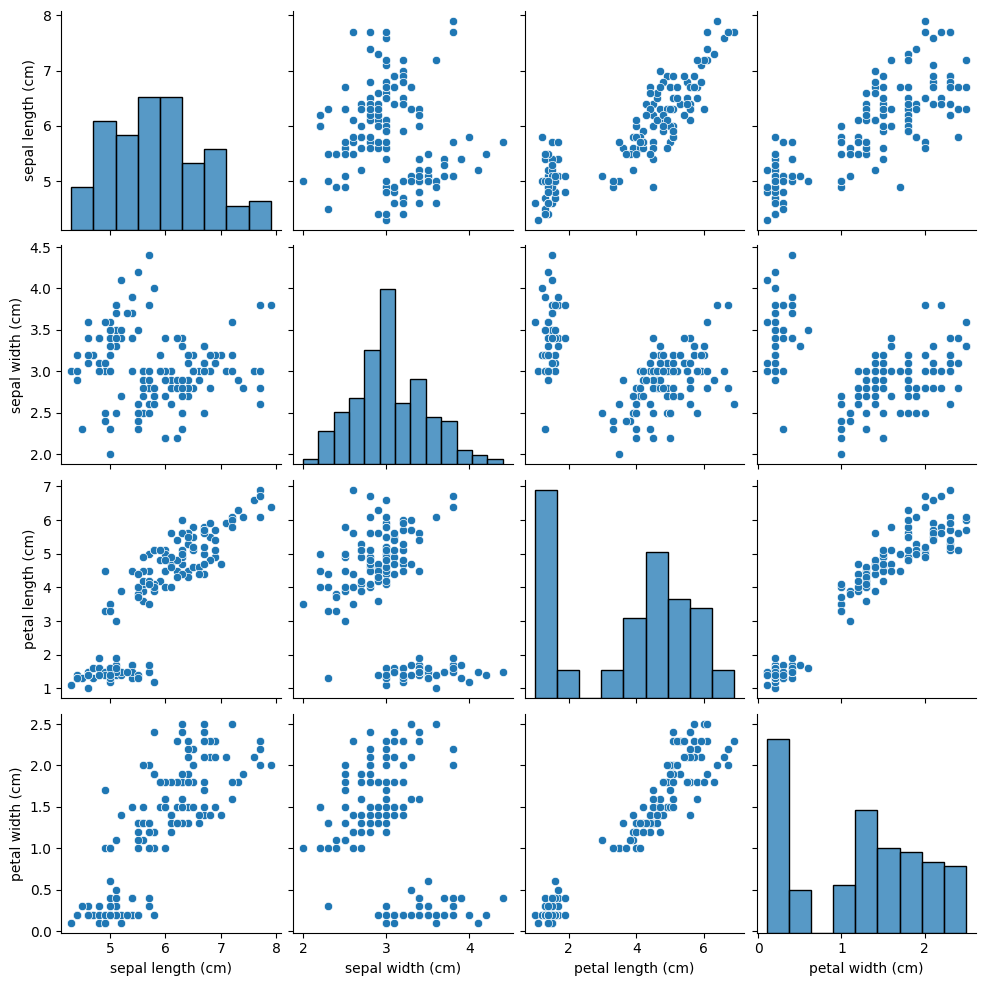

In [49]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

dataset = load_iris()
iris = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
sns.pairplot(iris)

In [47]:
dataset.keys() 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [50]:
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [51]:
import statsmodels.api as sm

Boston = sm.datasets.get_rdataset("Boston", package="MASS")
boston_df = Boston.data

In [52]:
import statsmodels.formula.api as smf

formula = "medv~" + "+".join(boston_df.iloc[:,:-1].columns)
formula

'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [53]:
from patsy import dmatrices

y, X = dmatrices(formula, boston_df, return_type="dataframe")

In [54]:
X

,Intercept,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [55]:
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [58]:
X.shape

(506, 14)

In [56]:
import pandas as pd

vif = pd.DataFrame()

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,585.265238,Intercept
1,1.792192,crim
2,2.298758,zn
3,3.991596,indus
4,1.073995,chas
5,4.393720,nox
6,1.933744,rm
7,3.100826,age
8,3.955945,dis
9,7.484496,rad


In [ ]:
# model_boston = smf.ols(formula='medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat-1', 
#                        data=boston_df).fit() 
# model_boston.summary()

In [59]:
def get_vif(formula, df):
    from patsy import dmatrices
    y, X = dmatrices(formula, df, return_type="dataframe")
    import pandas as pd
    vif = pd.DataFrame()
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif

In [60]:
# formula = "medv~" + "+".join(boston_df.iloc[:, :-1].columns) + "-1"
formula = 'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat-1'
print(formula)
get_vif(formula, boston_df)

medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat-1


,VIF Factor,features
0,2.100373,crim
1,2.844013,zn
2,14.485758,indus
3,1.152952,chas
4,73.894947,nox
5,77.948283,rm
6,21.386850,age
7,14.699652,dis
8,15.167725,rad
9,61.227274,tax


In [66]:
formula = 'medv~crim+zn+indus+chas+dis+rad+lstat-1'
print(formula)
get_vif(formula, boston_df)

medv~crim+zn+indus+chas+dis+rad+lstat-1


,VIF Factor,features
0,2.067135,crim
1,2.299351,zn
2,6.900077,indus
3,1.086574,chas
4,3.968908,dis
5,4.678181,rad
6,6.726973,lstat


In [67]:
model_boston = smf.ols(formula='medv~crim+zn+indus+chas+dis+rad+lstat-1', data=boston_df).fit() 
model_boston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.820
Method:                 Least Squares   F-statistic:                              330.1
Date:                Tue, 26 Nov 2024   Prob (F-statistic):                   1.03e-182
Time:                        17:22:49   Log-Likelihood:                         -1895.9
No. Observations:                 506   AIC:                                      3806.
Df Residuals:                     499   BIC:                                      3835.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.1840      0.071     -2.599      0.010      -0.323      -0.045
zn             0.0529      0.027      1.970      0.049       0.000       0.106
indus          0.8391      0.092      9.098      0.000       0.658       1.020
chas           9.1546      1.820      5.031      0.000       5.580      12.730
dis            3.6821      0.211     17.469      0.000       3.268       4.096
rad            0.1755      0.077      2.283      0.023       0.024       0.327
lstat         -0.3776      0.082     -4.606      0.000      -0.539      -0.217
==============================================================================
Omnibus:                       94.793   Durbin-Watson:                   0.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.764
Skew:                           1.110   Prob(JB):                     2.75e-36
Kurtosis:                       4.686   Cond. No.                         107.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""